# Análisis

In [99]:
# Librerías
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interpolate
import glob
import math
import csv
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
mpl.rcParams.update(mpl.rcParamsDefault)

### Lectura de datos de densidad de reliquia provenientes de micrOmegas

Buscamos acumular todos los puntos almacenados en diferentes archivos csv guardados en algún directorio.

In [100]:
# Nombre del directorio que contiene los datos a analizar
csv_dir = 'outputs'

# Usando glob para encontrar todos los csv del directorio
csv_files = glob.glob(f'{csv_dir}/*.csv')

# Arreglo para almacenar todo
all_arrays = np.array([])

# Contador para cambiar el comportamiento de la primera iteración

i = 0

# Ciclo para cada archivo csv
for file_path in csv_files:
    with open(file_path, mode='r') as file:
        # Creando objeto de csv reader
        csv_reader = csv.reader(file)
        
        # Convirtiendo en arreglo de numpy
        data = np.loadtxt(file_path, delimiter=',')

        # El primero lo asigna
        if i==0:
            all_arrays = data
        
        # El resto se concatenan
        else:
            all_arrays = np.concatenate([all_arrays, data],axis=0)
    i+=1

all_arrays = all_arrays

Una vez procesado nos interesa ver la forma del arreglo final:

In [101]:
print(all_arrays.shape)

(9999, 21)


### Filtros para resultados de densidad de reliquia

No todos los puntos generados aleatoreamente generan densidades de reliquia que nos interesan. Por esto buscamos filtrar los puntos que por algún motivo no son válidos o no son de interés.

In [102]:
# Asignando el arreglo de data

data = all_arrays

# Extraer parametros para probar acoples no imaginarios

mass_2 = data[:, 2]

couplings = data[:, 16]

omega_column = data[:, -1]

# Densidad de reliquia correcta (Entre 0.11 y 0.13)

cond1 = (0.11 < omega_column)

cond2 = (omega_column < 0.13)

# Teoría efectiva válida

cond3 = (couplings < 1/mass_2**2)

condtot = cond1*cond2*cond3

# Filtrar los valores que esten en el intervalo
data_filtered = data[condtot, :]

In [103]:
# Filtrando los valores unicos para la masa del campo escalar real
unique_values = np.unique(data_filtered[:, 2])

m1 = np.unique(data_filtered[:, 0])[0]

DMdelSA = np.unique(data_filtered[:, 15])[0]

DMdelAB = np.unique(data_filtered[:, 17])[0]

# Diccionario para almacenar los valores más cercanos para cada valor único de la masa
closest_values = {}

OmegaDM = 0.1198

for value in unique_values:
    # Tomando las filas donde la masa coincide con el valor único 
    filtered_data = data[data[:, 2] == value]

   # Tomando el valor del coeficiente
    second_column = filtered_data[:, 16]

    # Tomando la densidad de reliquia
    last_column = filtered_data[:, -1]
    
    # Encontrando el valor del coeficiente que minimiza la diferencia de la densidad de reliquia con 0.1198
    closest_value = second_column[np.abs(last_column - OmegaDM).argmin()]
    
    # Aplicanod la condición y almacenando en un diccionario
    closest_values[value] = closest_value

# Convirtiendo el diccionario en una lista
closest_values_list = [(key, value) for key, value in closest_values.items()]

# Convirtiendo la lista en un arreglo de numpy
line = np.array(closest_values_list)

Ahora queremos ver cuandos puntos sobrevivieron a todos los filtros:

In [104]:
print(data_filtered.shape)

(83, 21)


## Generando Gráficas

Finalmente queremos proyectar los puntos admitidos que generan la densidad de reliquia correcta sobre algunos de los parámetros del modelo:

### Detección Directa

### El Resto de Parámetros

In [105]:
print(DMdelSA)

1e-05


In [106]:
print(DMdelAB)

1e-06


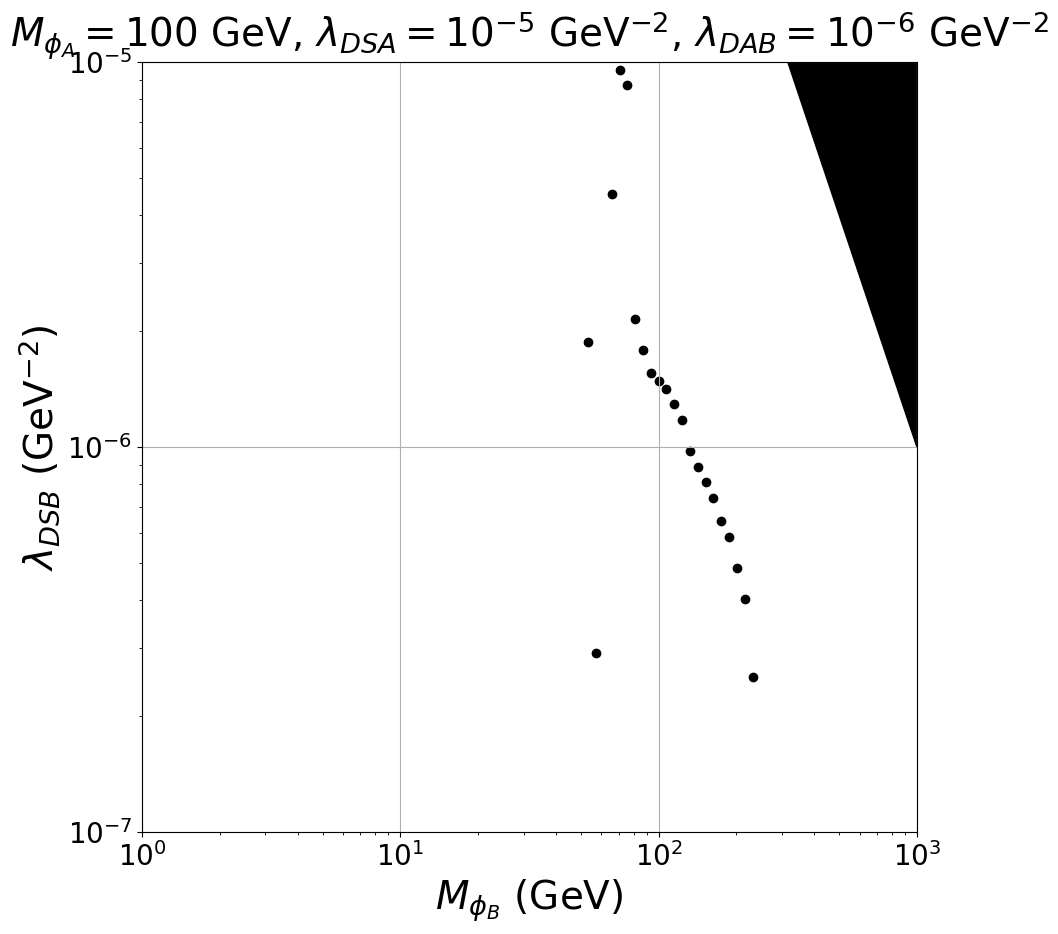

In [107]:
plt.figure(figsize=(10,10))
plt.scatter(line[:,0],line[:,1], color='black')
plt.xscale('log')
plt.yscale('log')

plt.title(rf"$M_{{\phi_A}} = {int(m1)}$ GeV, $\lambda_{{DSA}} = 10^{{-5}}$ GeV$^{{-2}}$, $\lambda_{{DAB}} = 10^{{-6}}$ GeV$^{{-2}}$", size=28)

linecutX = np.arange(1,1000,1)
linecutY = 1/linecutX**2
plt.fill_between(linecutX,linecutY, np.max(linecutY), color='black')

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$\lambda_{DSB}$ (GeV$^{{-2}}$)", size=28)
plt.xlabel(r"$M_{\phi_B}$ (GeV)", size=28)
plt.xlim(1,1000)
plt.ylim(1e-7,1e-5)
plt.grid()
plt.savefig("plots/relicdensity0.eps", bbox_inches='tight')
plt.show()

In [108]:
''' 
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:, 2], data_filtered[:, 11], color='black')
plt.xscale('log')
plt.yscale('log')

plt.title(rf"$M_{{\phi_1}} = {m1} \; GeV$, $\lambda_{{S44}} = {DMlambS41} \; GeV^{{-2}}$", size=28)

linecutX = np.arange(1,1000,1)
linecutY = 1/linecutX**2
plt.fill_between(linecutX,linecutY, np.max(linecutY), color='black')

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$\lambda_{S44}$", size=28)
plt.xlabel(r"$M_{\phi_4}$", size=28)
plt.xlim(1,1000)
plt.ylim(1e-8,1e-5)
plt.grid()
plt.savefig("plots/relicdensity1.eps")
plt.show()
'''

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_60845/3358938108.py:1: SyntaxWarning: invalid escape sequence '\p'
  '''


' \nplt.figure(figsize=(10,10))\nplt.scatter(data_filtered[:, 2], data_filtered[:, 11], color=\'black\')\nplt.xscale(\'log\')\nplt.yscale(\'log\')\n\nplt.title(rf"$M_{{\\phi_1}} = {m1} \\; GeV$, $\\lambda_{{S44}} = {DMlambS41} \\; GeV^{{-2}}$", size=28)\n\nlinecutX = np.arange(1,1000,1)\nlinecutY = 1/linecutX**2\nplt.fill_between(linecutX,linecutY, np.max(linecutY), color=\'black\')\n\nplt.xticks(size=20)\nplt.yticks(size=20)\nplt.ylabel(r"$\\lambda_{S44}$", size=28)\nplt.xlabel(r"$M_{\\phi_4}$", size=28)\nplt.xlim(1,1000)\nplt.ylim(1e-8,1e-5)\nplt.grid()\nplt.savefig("plots/relicdensity1.eps")\nplt.show()\n'

### Proporción de densidad de reliquia

In [109]:
# Filtrando los valores unicos para la masa del campo escalar real
unique_values = np.unique(data_filtered[:, 2])

m1 = np.unique(data_filtered[:, 0])[0]

DMdelSA = np.unique(data_filtered[:, 15])[0]

DMdelAB = np.unique(data_filtered[:, 17])[0]


# Diccionario para almacenar los valores más cercanos para cada valor único de la masa
closest_values = {}

OmegaDM = 0.1198

for value in unique_values:
    # Tomando las filas donde la masa coincide con el valor único 
    filtered_data = data[data[:, 2] == value]

   # Tomando el valor del coeficiente
    second_column = filtered_data[:, -2]/filtered_data[:, -1]

    # Tomando la densidad de reliquia
    last_column = filtered_data[:, -1]
    
    # Encontrando el valor del coeficiente que minimiza la diferencia de la densidad de reliquia con 0.1198
    closest_value = second_column[np.abs(last_column - OmegaDM).argmin()]
    
    # Aplicanod la condición y almacenando en un diccionario
    closest_values[value] = closest_value

# Convirtiendo el diccionario en una lista
closest_values_list = [(key, value) for key, value in closest_values.items()]

# Convirtiendo la lista en un arreglo de numpy
lineXi = np.array(closest_values_list)

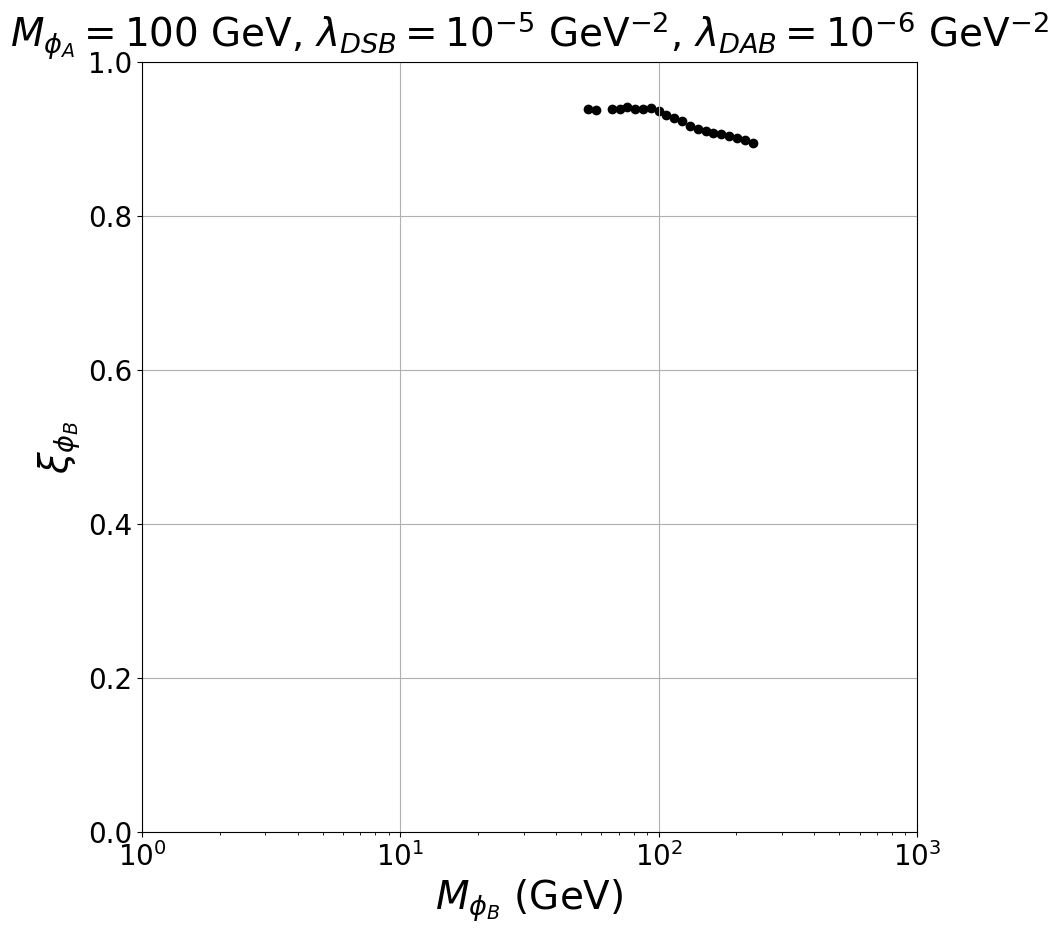

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(lineXi[:,0],lineXi[:,1], color='black')
plt.xscale('log')
#plt.yscale('log')

plt.title(rf"$M_{{\phi_A}} = {int(m1)}$ GeV, $\lambda_{{DSB}} = 10^{{-5}}$ GeV$^{{-2}}$, $\lambda_{{DAB}} = 10^{{-6}}$ GeV$^{{-2}}$", size=28)

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$\xi_{\phi_B}$", size=28)
plt.xlabel(r"$M_{\phi_B}$ (GeV)", size=28)
plt.xlim(1,1000)
plt.ylim(0,1)
plt.grid()
plt.savefig("plots/relicdensity1.eps", bbox_inches='tight')
plt.show()

In [111]:
''' 
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:, 2], data_filtered[:, -2]/data_filtered[:, -1], color='black')
plt.xscale('log')

plt.title(rf"$M_{{\phi_1}} = {m1} \; GeV$, $\lambda_{{S44}} = {DMlambS41} \; GeV^{{-2}}$", size=28)

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$\xi_{\phi_4}$", size=28)
plt.xlabel(r"$M_{\phi_4}$", size=28)
plt.xlim(1,1000)
plt.ylim(0, 1)
plt.grid()
plt.savefig("plots/relicdensity3.eps")
plt.show()
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 295-296: truncated \xXX escape (4044391852.py, line 1)